In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter


In [3]:
df=pd.read_csv("concertriccir2.csv",header=None)
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [4]:
df.shape

(500, 3)

In [5]:
names=['x','y','class']
df=pd.read_csv("concertriccir2.csv",header=None,names=names)
df.head()

,x,y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [6]:
X=np.array(df.iloc[:,0:2])
y=np.array(df['class'])

In [9]:
X[:5]

array([[ 0.70033457, -0.24706758],
       [-3.95001869,  2.74007953],
       [ 0.15022162, -2.1576378 ],
       [-1.67205033, -0.94151907],
       [ 2.56048303, -1.84657672]])

In [10]:
y[:5]

array([0., 1., 1., 1., 1.])

# 1.Simple Cross Validation

In [12]:
#Splitted my data into Train and Test
X_1,X_test,y_1,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [13]:
len(X_1)

350

In [14]:
len(X_test)

150

In [15]:
#Splitted my Training data into Train and Cross Validation Test
X_tr,X_cv,y_tr,y_cv=train_test_split(X_1,y_1,test_size=0.3,random_state=10)

In [16]:
len(X_tr),len(X_cv)

(245, 105)

In [17]:
0.7*350

244.99999999999997

In [18]:
range(1,30,2)

range(1, 30, 2)

In [19]:
for i in range(1,30,2):
    print(i)
    

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29


In [20]:
for i in range(1,30,2):
    #instantiate the learning model
    knn=KNeighborsClassifier(n_neighbors=i)
    #fit the model on train data
    knn.fit(X_tr,y_tr)
    #predict the response on cross validation data
    pred=knn.predict(X_cv)
    #evaluate CV accuracy
    acc=accuracy_score(y_cv,pred,normalize=True)*float(100)
    print('\nCV accuracy for k= %d is %d%%' % (i,acc))
    


CV accuracy for k= 1 is 80%

CV accuracy for k= 3 is 82%

CV accuracy for k= 5 is 81%

CV accuracy for k= 7 is 80%

CV accuracy for k= 9 is 76%

CV accuracy for k= 11 is 74%

CV accuracy for k= 13 is 74%

CV accuracy for k= 15 is 76%

CV accuracy for k= 17 is 75%

CV accuracy for k= 19 is 74%

CV accuracy for k= 21 is 72%

CV accuracy for k= 23 is 68%

CV accuracy for k= 25 is 67%

CV accuracy for k= 27 is 66%

CV accuracy for k= 29 is 63%


In [21]:
#Now we will use the optimal k for my model
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_1,y_1)
pred=knn.predict(X_test)
#evaluate test accuracy
acc=accuracy_score(y_test,pred,normalize=True)*float(100)
print('\nTest accuracy for k= %d is %d%%' % (3,acc))


Test accuracy for k= 3 is 92%


# 2. K-fold Cross Validation

In [23]:
X_train=X_1
y_train=y_1

#list of values for k in KNN
mylist=list(range(0,3))
print(mylist)

[0, 1, 2]


In [25]:
neighbors=list(filter(lambda x:x%2!=0,mylist))
neighbors

[1]

In [27]:
#empty list to store my cv scores
cv_scores=[]

#perform 10-fold cross validation
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    print("k in KNN :",k,"\n","scores :",scores,"\n","scores.mean()",scores.mean())
    cv_scores.append(scores.mean())

k in KNN : 1 
 scores : [0.97142857 0.91428571 0.97142857 0.85714286 0.82857143 0.85714286
 0.85714286 0.88571429 0.88571429 0.88571429] 
 scores.mean() 0.8914285714285715


In [28]:
cv_scores

[0.8914285714285715]

In [29]:
X_train=X_1
y_train=y_1

#list of values for k in KNN
mylist=list(range(0,30))
neighbors=list(filter(lambda x:x%2!=0,mylist))

#empty list to store my cv scores
cv_scores=[]

#perform 10-fold cross validation
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    #print("k in KNN :",k,"\n","scores :",scores,"\n","scores.mean()",scores.mean())
    cv_scores.append(scores.mean())

In [30]:
cv_scores

[0.8914285714285715,
 0.877142857142857,
 0.8857142857142858,
 0.8714285714285716,
 0.8657142857142857,
 0.86,
 0.8485714285714288,
 0.8400000000000001,
 0.8200000000000001,
 0.8114285714285714,
 0.8057142857142858,
 0.7828571428571429,
 0.7742857142857142,
 0.7571428571428571,
 0.7428571428571429]

In [31]:
#calculate the misclassified error
MSE=[1-x for  x in cv_scores]
MSE

[0.10857142857142854,
 0.122857142857143,
 0.11428571428571421,
 0.12857142857142845,
 0.13428571428571434,
 0.14,
 0.15142857142857125,
 0.15999999999999992,
 0.17999999999999994,
 0.1885714285714286,
 0.19428571428571417,
 0.21714285714285708,
 0.22571428571428576,
 0.24285714285714288,
 0.2571428571428571]

In [32]:
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [33]:
#determine the best K in KNN
optimal_k=neighbors[MSE.index(min(MSE))]
print(" the optimal number of neighnprs is %d." % optimal_k)

 the optimal number of neighnprs is 1.


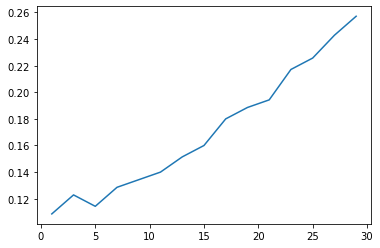

In [34]:
plt.plot(neighbors,MSE)

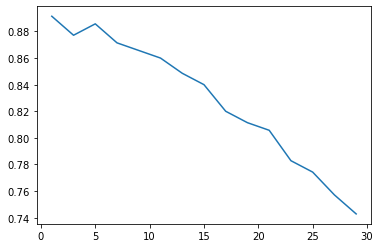

In [35]:
plt.plot(neighbors,cv_scores)

In [37]:
for xy in zip(neighbors,np.round(MSE,3)):
    print(xy)

(1, 0.109)
(3, 0.123)
(5, 0.114)
(7, 0.129)
(9, 0.134)
(11, 0.14)
(13, 0.151)
(15, 0.16)
(17, 0.18)
(19, 0.189)
(21, 0.194)
(23, 0.217)
(25, 0.226)
(27, 0.243)
(29, 0.257)


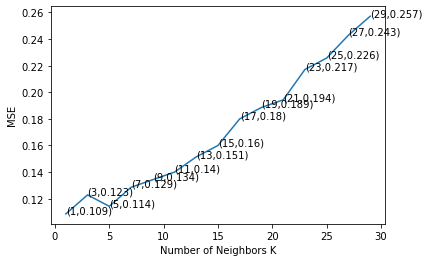

the missclassification error for each k value is : [0.109 0.123 0.114 0.129 0.134 0.14  0.151 0.16  0.18  0.189 0.194 0.217
 0.226 0.243 0.257]


In [39]:
plt.plot(neighbors,MSE)
for xy in zip(neighbors,np.round(MSE,3)):
    plt.annotate('(%s,%s)' % xy,xy=xy,textcoords='data')
    
plt.xlabel('Number of Neighbors K')
plt.ylabel('MSE')
plt.show()

print('the missclassification error for each k value is :',np.round(MSE,3))